<a href="https://colab.research.google.com/github/jansle2005/Data-Science-Repository/blob/master/ANATEL_EAD_SOLICITACOES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ANÁLISE RECLAMAÇÕES 2015-2020 ANATEL - POR ESTADO

In [ ]:
# Análise exploratória
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15952407 entries, 0 to 15952406
Data columns (total 18 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   DataExtracao               datetime64[ns]
 1   SOLICITAÇÕES               int64         
 2   Ano                        int64         
 3   Mês                        int64         
 4   AnoMês                     object        
 5   UF                         object        
 6   Cidade                     object        
 7   CO_MUNICIPIO               object        
 8   CanalEntrada               object        
 9   Condição                   object        
 10  TipoAtendimento            object        
 11  Serviço                    object        
 12  Marca                      object        
 13  Assunto                    object        
 14  Problema                   object        
 15  AnoMes                     object        
 16  populacao                  float64

In [ ]:
df.head(3)

,DataExtracao,SOLICITAÇÕES,Ano,Mês,AnoMês,UF,Cidade,CO_MUNICIPIO,CanalEntrada,Condição,TipoAtendimento,Serviço,Marca,Assunto,Problema,AnoMes,populacao,reclamacoes_por_habitante
0,2018-04-23,1,2015,1,2015-01,DF,Brasília,5300108,SIC,Reencaminhada,Pedido de Informação,Outros,Outros,NÃO APLICÁVEL,SIC,2018-04,3055149.0,3.273163e-07
1,2018-04-23,1,2015,1,2015-01,AC,Rio Branco,1200401,Fale Conosco,Nova,Reclamação,STFC,OI,Bloqueio ou Suspensão e Desbloqueio,Bloqueio ou suspensão indevido,2018-04,894470.0,1.117980e-06
2,2018-04-23,1,2015,1,2015-01,AL,Maceió,2704302,Fale Conosco,Nova,Reclamação,SMP_Pós,VIVO,Qualidade e Funcionamento do Serviço ou Equipa...,Lentidão ou velocidade reduzida de conexão,2018-04,3351543.0,2.983700e-07


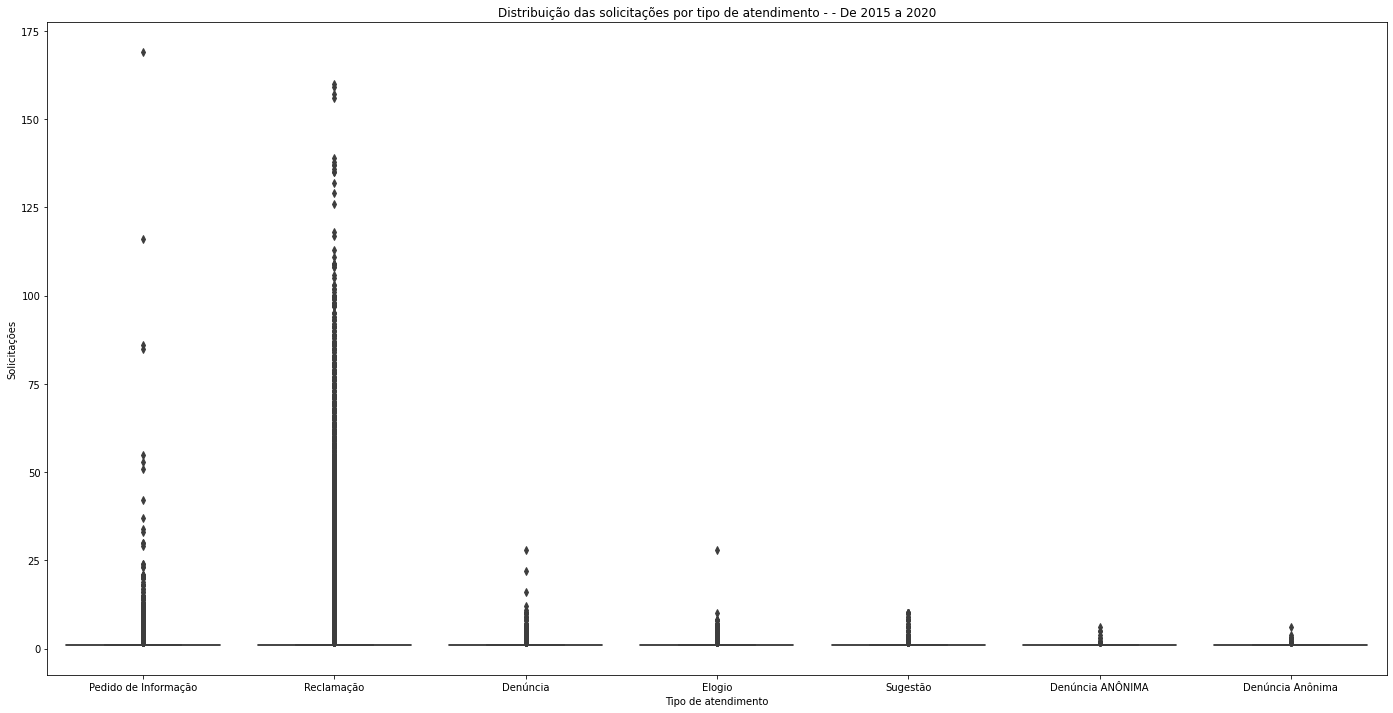

In [ ]:
# Distribuição das solicitações por tipo de atendimento
plt.figure(figsize=(24, 12))
sns.boxplot(x='TipoAtendimento', y='SOLICITAÇÕES', data=df)
plt.title('Distribuição das solicitações por tipo de atendimento - - De 2015 a 2020')
plt.xlabel('Tipo de atendimento')
plt.ylabel('Solicitações')
plt.show()


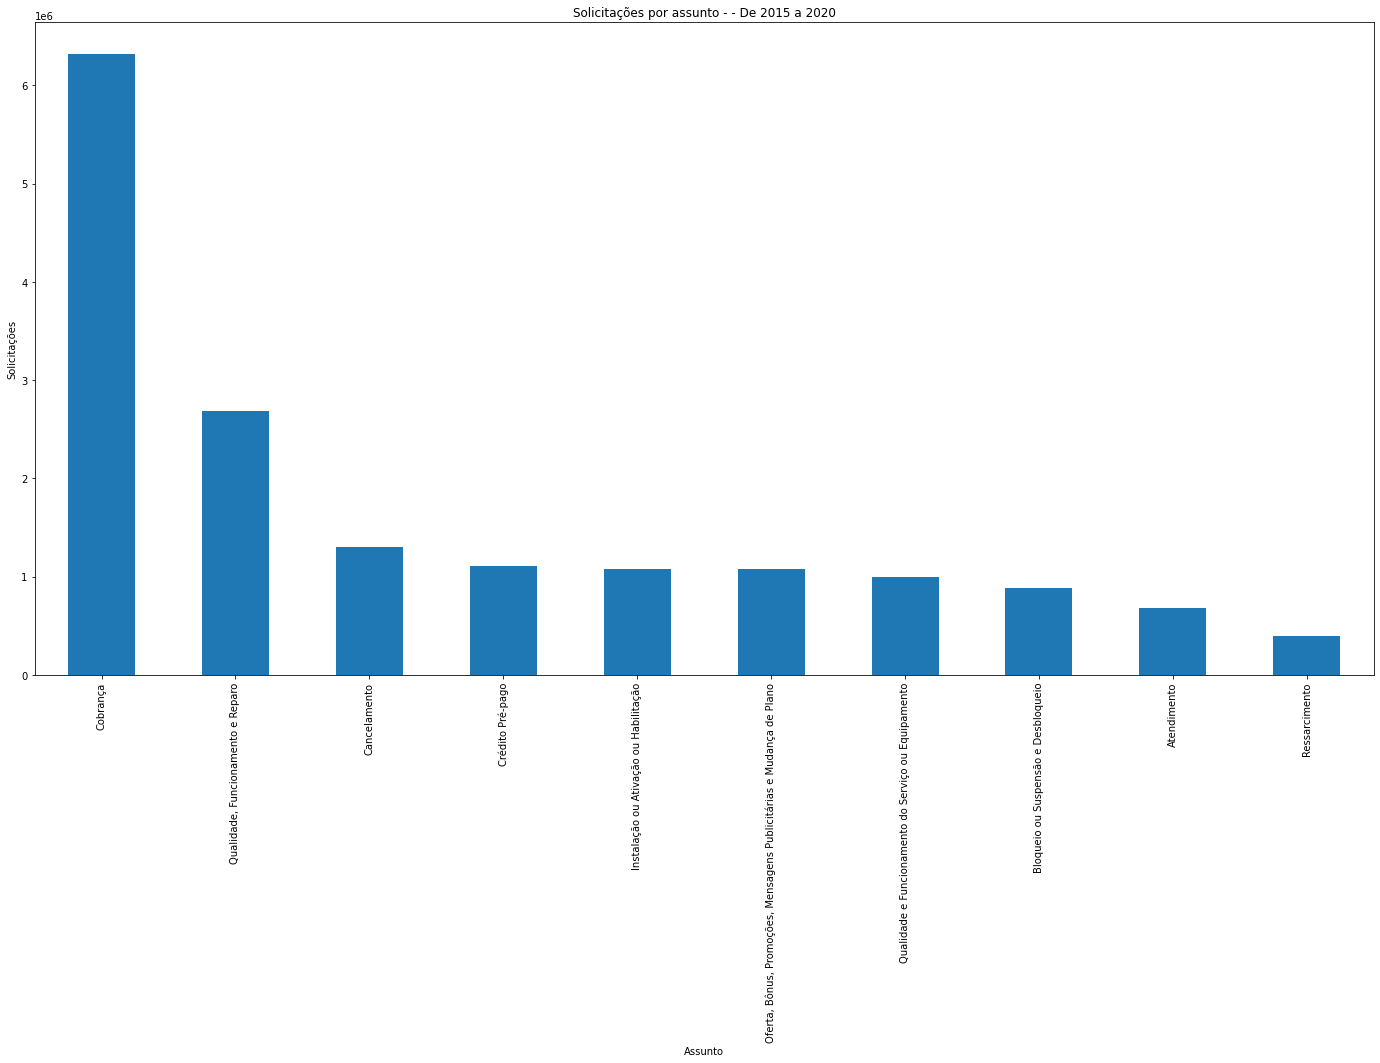

In [ ]:
# Solicitações por assunto

plt.figure(figsize=(24, 12))
df_assunto = df.groupby('Assunto' ).sum()
df_assunto['SOLICITAÇÕES'].sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('Solicitações por assunto - - De 2015 a 2020')
plt.xlabel('Assunto')
plt.ylabel('Solicitações')
plt.show()


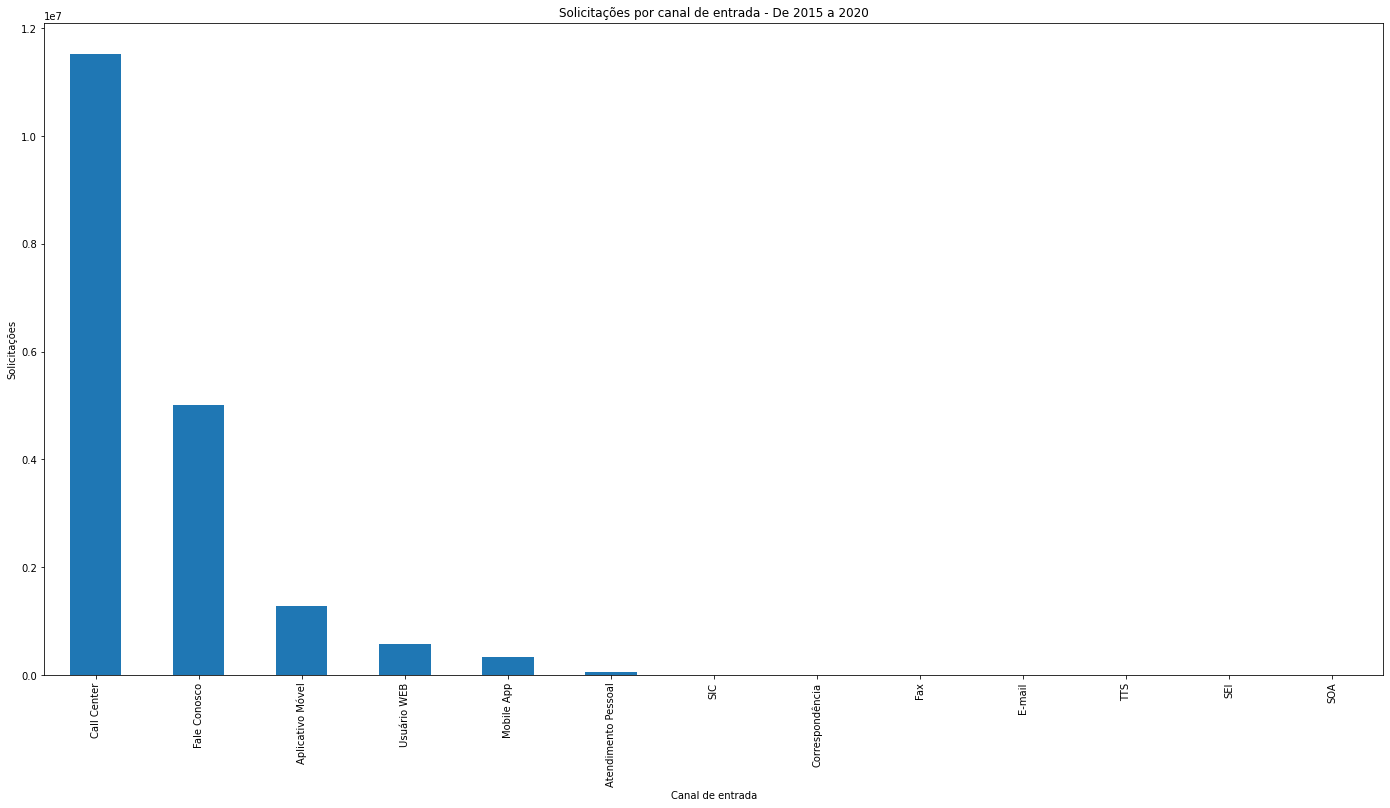

In [ ]:
plt.figure(figsize=(24, 12))
# Solicitações por canal de entrada
df_canal = df.groupby('CanalEntrada' ).sum()
df_canal['SOLICITAÇÕES'].sort_values(ascending=False).plot(kind='bar')
plt.title('Solicitações por canal de entrada - De 2015 a 2020')
plt.xlabel('Canal de entrada')
plt.ylabel('Solicitações')
plt.show()



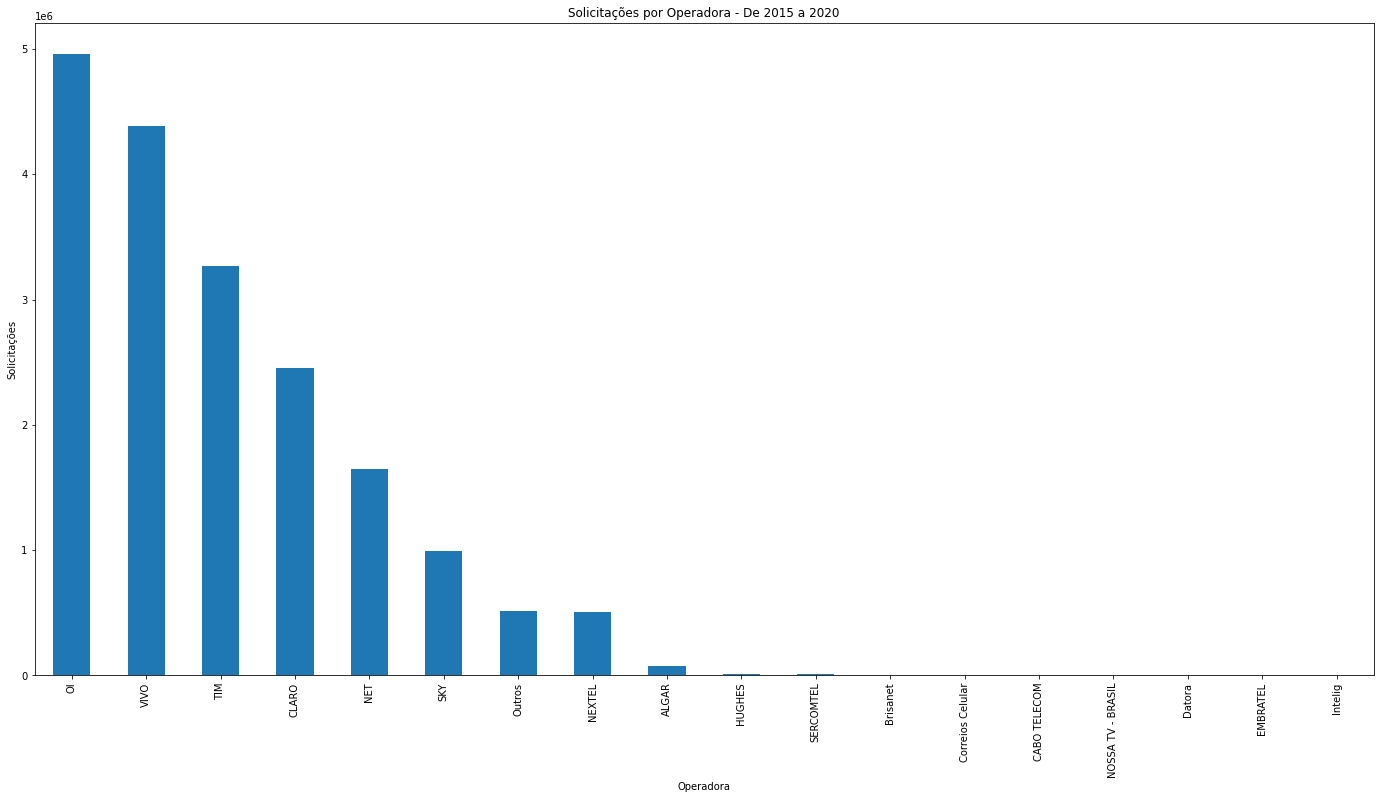

In [ ]:
# Solicitações por marca
plt.figure(figsize=(24, 12))
df_marca = df.groupby('Marca').sum()
df_marca['SOLICITAÇÕES'].sort_values(ascending=False).plot(kind='bar')
plt.title('Solicitações por Operadora - De 2015 a 2020')
plt.xlabel('Operadora')
plt.ylabel('Solicitações')
plt.show()


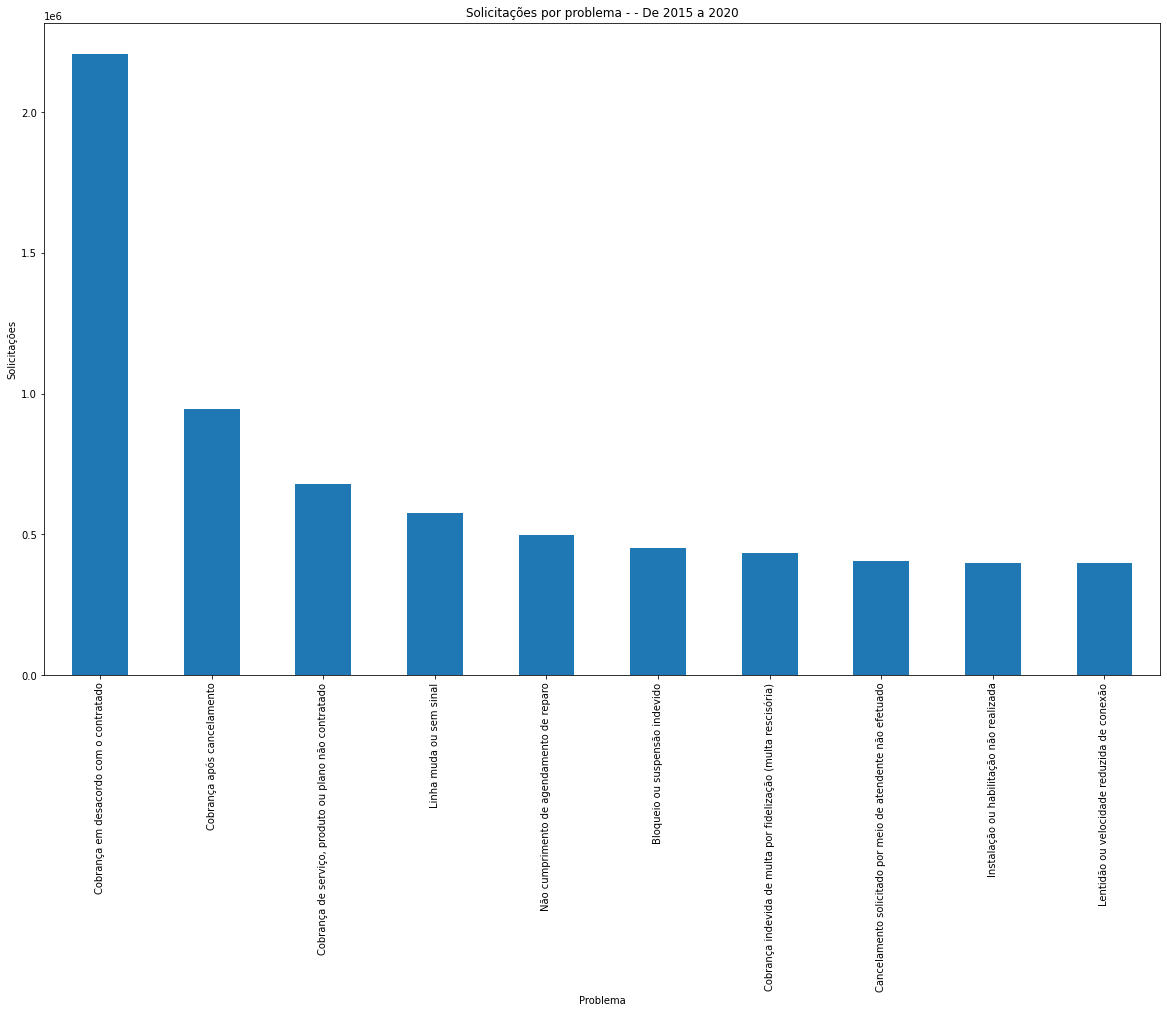

In [ ]:

# Solicitações por problema
plt.figure(figsize=(20, 12))
df_problema = df.groupby('Problema' ).sum()
df_problema['SOLICITAÇÕES'].sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('Solicitações por problema - - De 2015 a 2020')
plt.xlabel('Problema')
plt.ylabel('Solicitações')
plt.show()

In [ ]:
# Análise geográfica
populacao_por_estado = {
    'AC': 894470, 'AL': 3351543, 'AM': 4207714, 'AP': 861773, 'BA': 14930634, 
    'CE': 9187103, 'DF': 3055149, 'ES': 4064052, 'GO': 7113540, 'MA': 7075181, 
    'MG': 21168791, 'MS': 2809394, 'MT': 3526220, 'PA': 8690745, 'PB': 4039277, 
    'PE': 9834299, 'PI': 3273227, 'PR': 11516840, 'RJ': 17366189, 'RN': 3560903, 
    'RO': 1796460, 'RR': 631181, 'RS': 11422973, 'SC': 7164788, 'SE': 2318822, 
    'SP': 46289333, 'TO': 1590248
}


In [ ]:
df['populacao'] = df['UF'].map(populacao_por_estado)
df['reclamacoes_por_habitante'] = df['SOLICITAÇÕES'] / df['populacao']

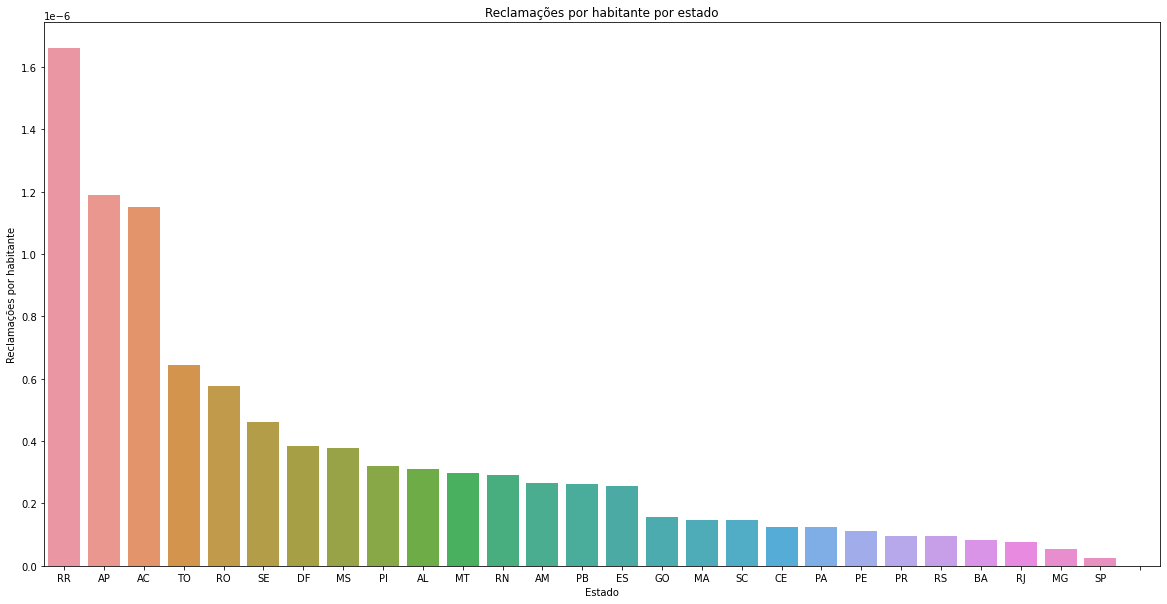

In [ ]:
# Agrupar por estado e calcular a média das reclamações por habitante
df_uf = df.groupby('UF').mean()['reclamacoes_por_habitante'].sort_values(ascending=False)
# Plotar o gráfico de barras
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x=df_uf.index, y=df_uf.values, ax=ax)
plt.title('Reclamações por habitante por estado')
plt.xlabel('Estado')
plt.ylabel('Reclamações por habitante')

# Ajustar tamanho da figura
fig.set_size_inches(20, 10)
plt.show()


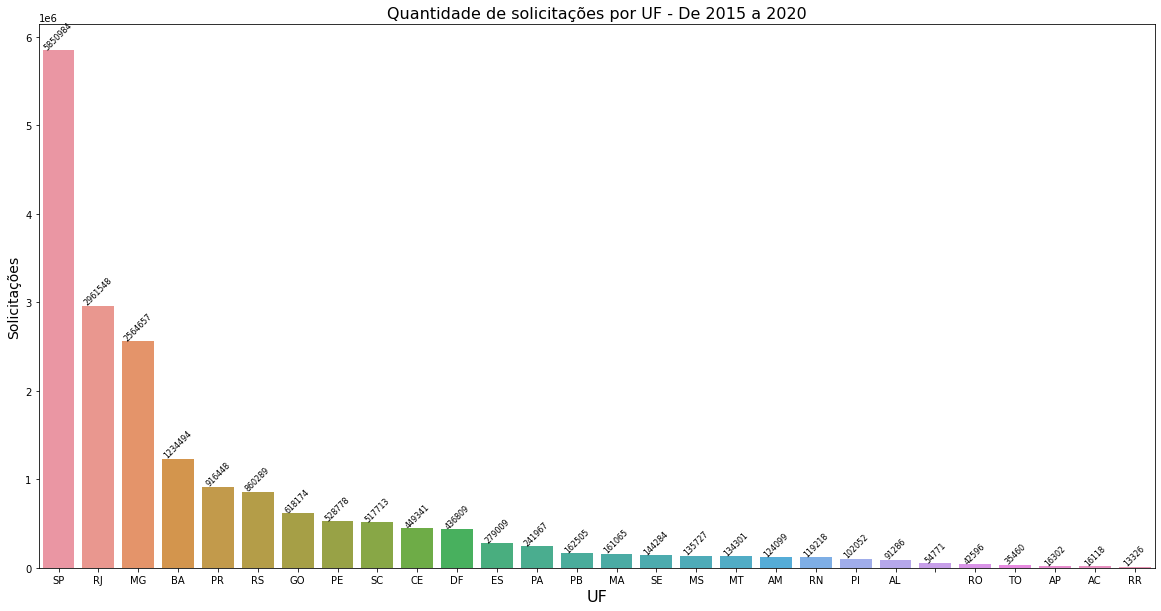

In [ ]:
df_uf = df.groupby('UF').sum()['SOLICITAÇÕES'].sort_values(ascending=False)

# Plotar o gráfico de barras
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x=df_uf.index, y=df_uf.values, ax=ax)

# Adicionar títulos e rótulos aos eixos
ax.set_title('Quantidade de solicitações por UF - De 2015 a 2020', fontsize=16)
ax.set_xlabel('UF', fontsize=16)
ax.set_ylabel('Solicitações', fontsize=14)

# Adicionar valor numérico em cima das barras
for i, v in enumerate(df_uf.values):
    ax.text(i, v+10000, str(v), ha='center', fontsize=8, rotation=45)
    
plt.show()

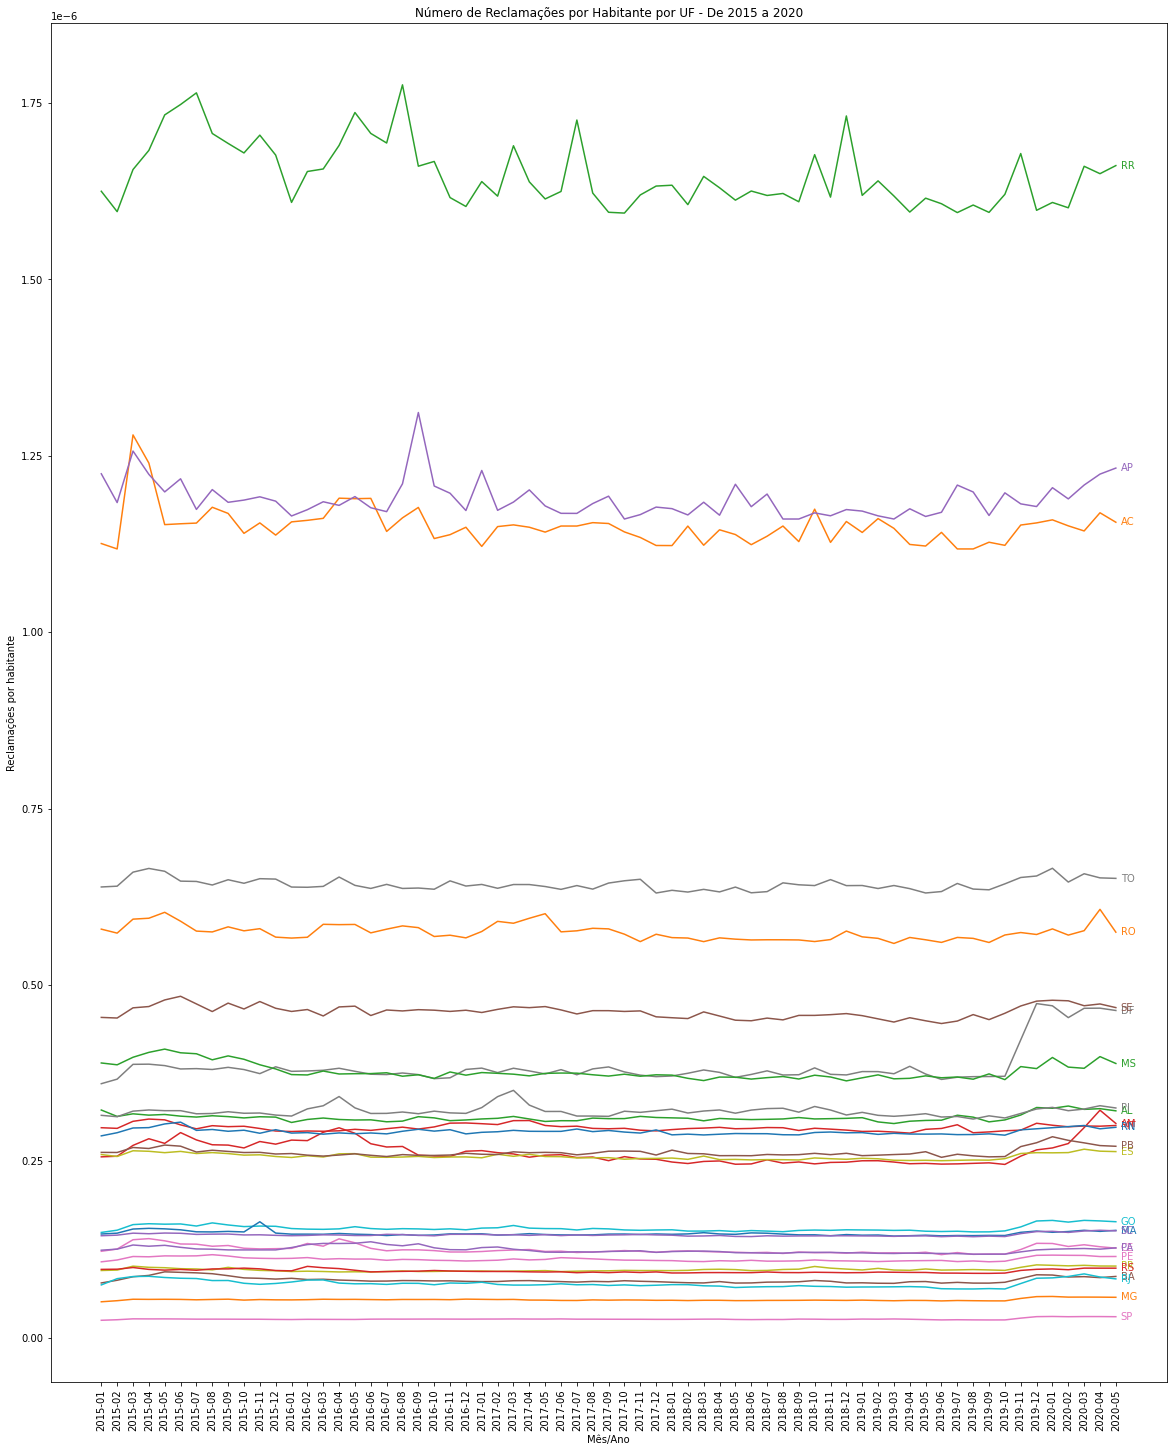

In [ ]:
# Filtrar as colunas necessárias
df1 = df[['UF', 'AnoMês', 'reclamacoes_por_habitante']]

# Agrupar os dados por UF e AnoMês
df_agg = df1.groupby(['UF', 'AnoMês']).mean().reset_index()

# Criar a figura
fig, ax = plt.subplots(figsize=(20, 25))

# Plotar o gráfico de linha para cada UF
for uf in df_agg['UF'].unique():
    df_uf = df_agg[df_agg['UF'] == uf]
    ax.plot(df_uf['AnoMês'], df_uf['reclamacoes_por_habitante'], label=uf)
    
    # Adicionar legenda ao lado da linha
    last_point = df_uf.tail(1)
    ax.annotate(uf, xy=(last_point['AnoMês'], last_point['reclamacoes_por_habitante']),
                xytext=(5, 0), textcoords="offset points", va="center", ha='left', color=ax.get_lines()[-1].get_color())

# Definir título e legendas
ax.set_title('Número de Reclamações por Habitante por UF - De 2015 a 2020')
ax.set_xlabel('Mês/Ano')
ax.set_ylabel('Reclamações por habitante')
#ax.legend()

# Rotacionar os rótulos do eixo x em 45 graus
plt.xticks(rotation=90)

# Exibir o gráfico
plt.show()




**### Gráfico sem o 3 maiores**

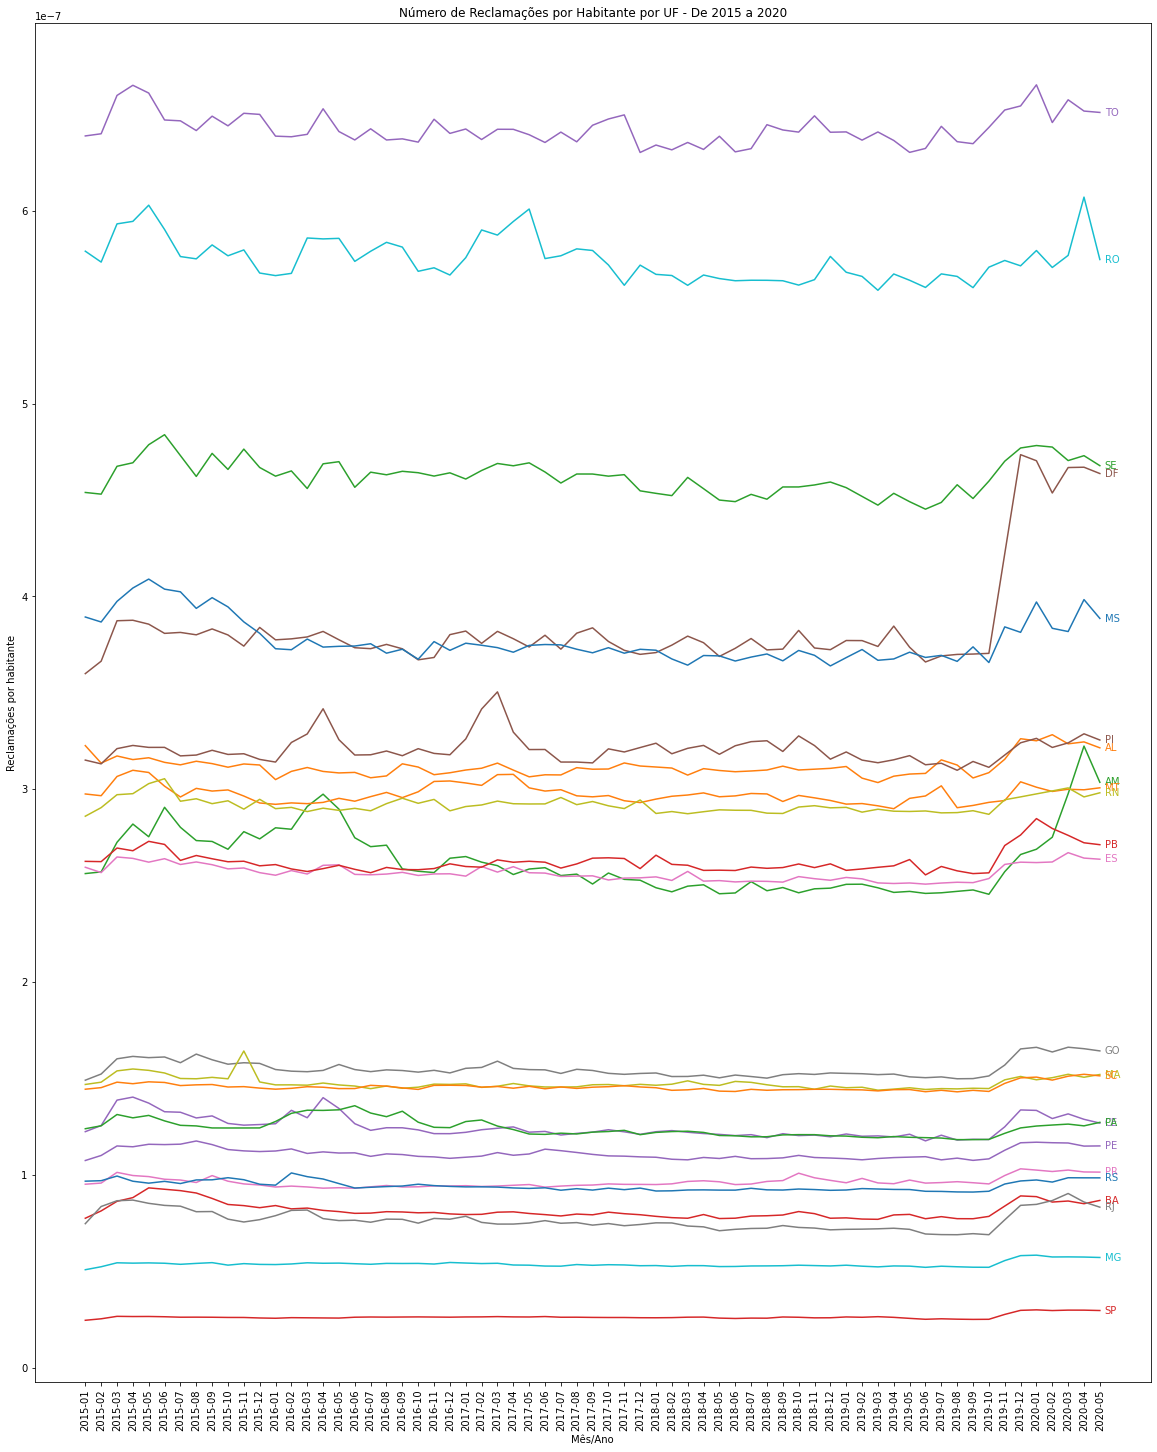

In [ ]:
# Filtrar as colunas necessárias
df1 = df[['UF', 'AnoMês', 'reclamacoes_por_habitante']]

# Agrupar os dados por UF e AnoMês e calcular a média de reclamações por habitante
df_agg = df1.groupby(['UF', 'AnoMês']).mean().reset_index()

# Encontrar os 3 estados com maior reclamações por habitante
top_3_uf = df_agg.groupby('UF').mean()['reclamacoes_por_habitante'].nlargest(3).index

# Filtrar as linhas que não são dos 3 estados com maior reclamações por habitante
df_agg = df_agg[~df_agg['UF'].isin(top_3_uf)]

# Criar a figura
fig, ax = plt.subplots(figsize=(20, 25))

# Plotar o gráfico de linha para cada UF
for uf in df_agg['UF'].unique():
    df_uf = df_agg[df_agg['UF'] == uf]
    ax.plot(df_uf['AnoMês'], df_uf['reclamacoes_por_habitante'], label=uf)
    
    # Adicionar legenda ao lado da linha
    last_point = df_uf.tail(1)
    ax.annotate(uf, xy=(last_point['AnoMês'], last_point['reclamacoes_por_habitante']),
                xytext=(5, 0), textcoords="offset points", va="center", ha='left', color=ax.get_lines()[-1].get_color())

# Definir título e legendas
ax.set_title('Número de Reclamações por Habitante por UF - De 2015 a 2020')
ax.set_xlabel('Mês/Ano')
ax.set_ylabel('Reclamações por habitante')
#ax.legend()

# Rotacionar os rótulos do eixo x em 45 graus
plt.xticks(rotation=90)

# Exibir o gráfico
plt.show()



# # Aplicando CEP aos dados de reclamação por habitate de cada UF desde 2015 até 2020

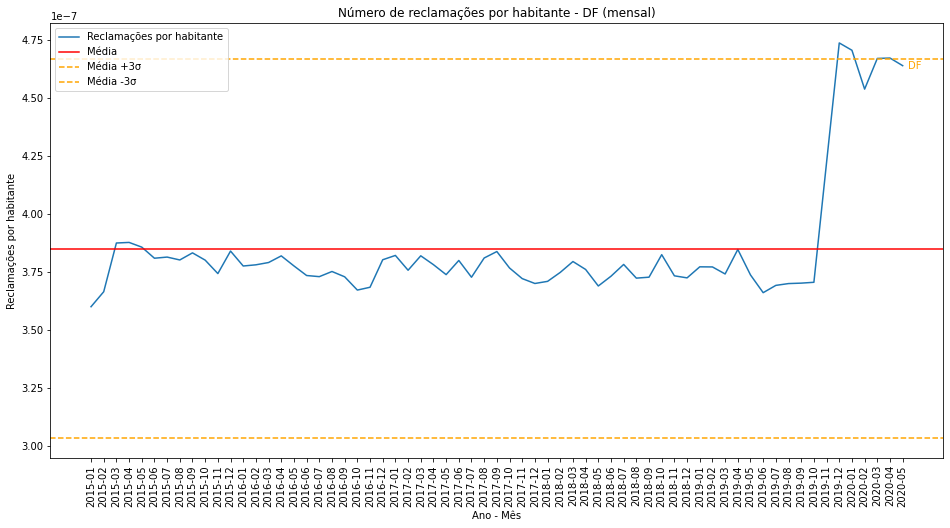

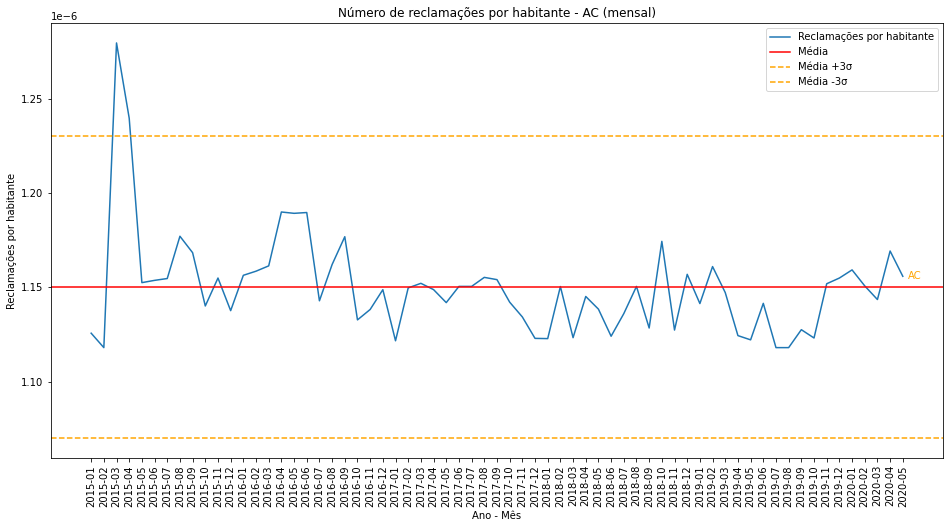

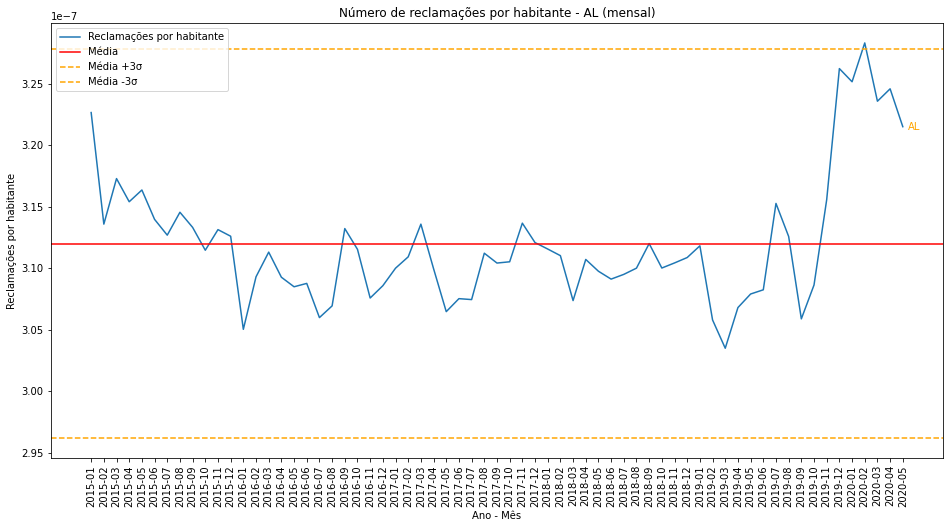

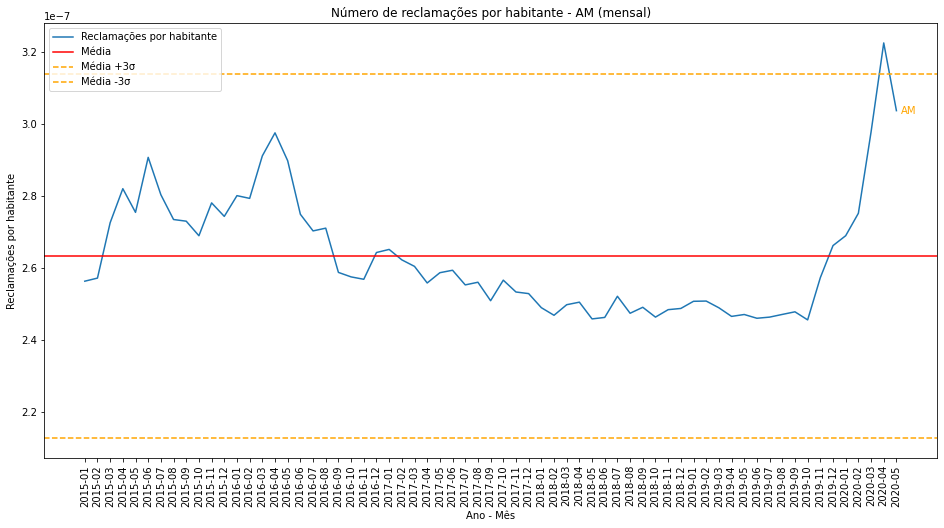

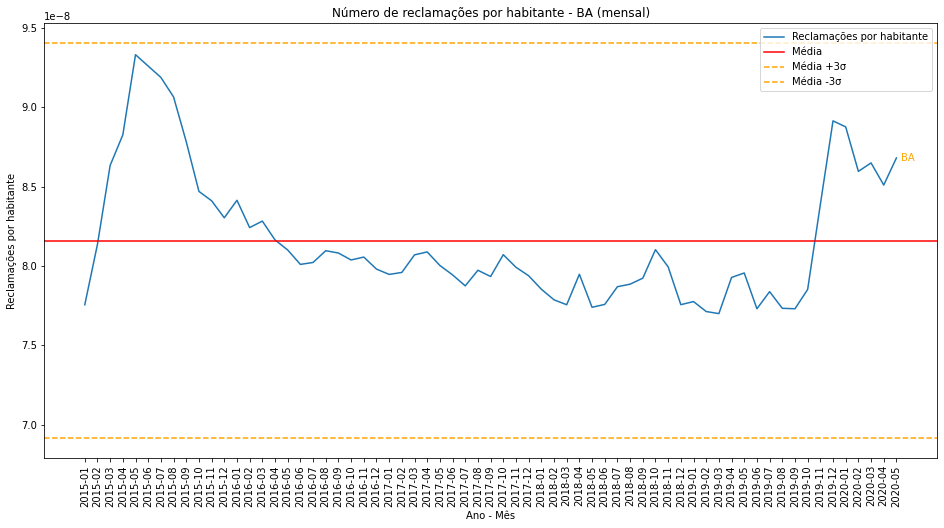

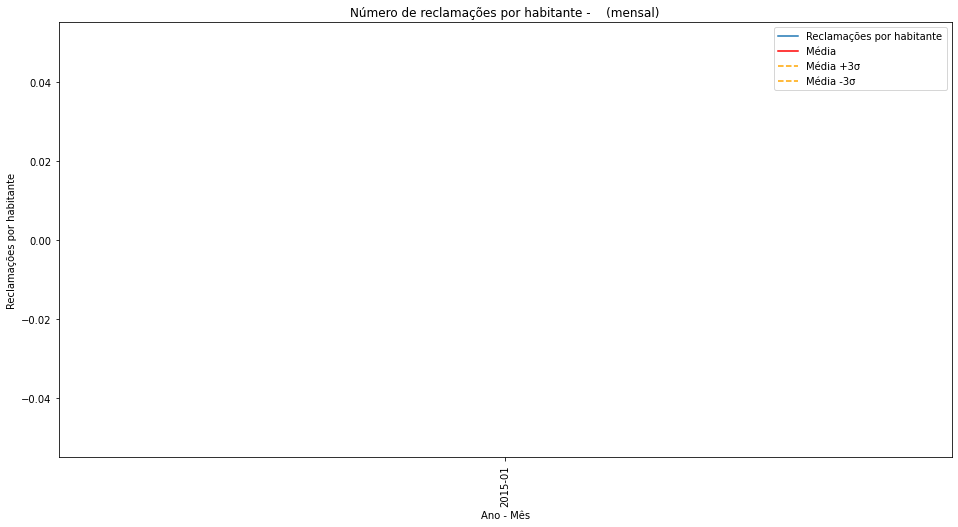

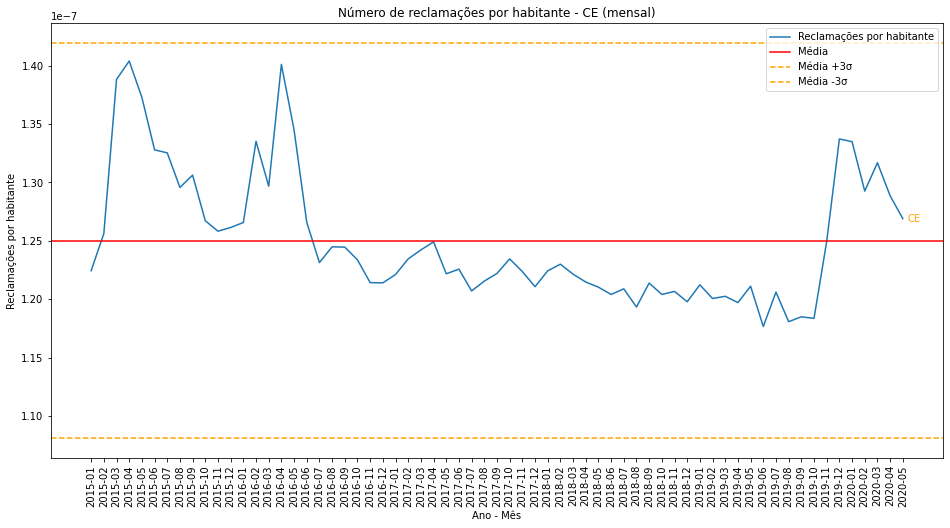

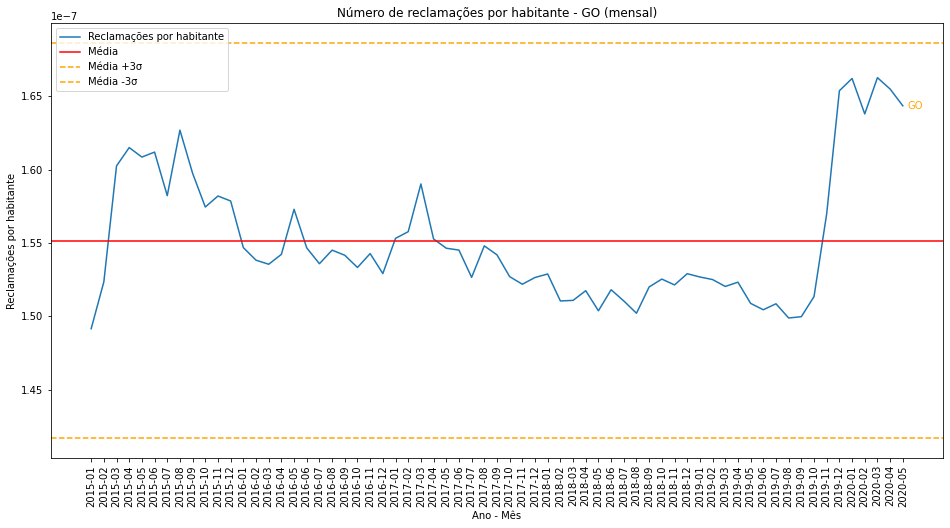

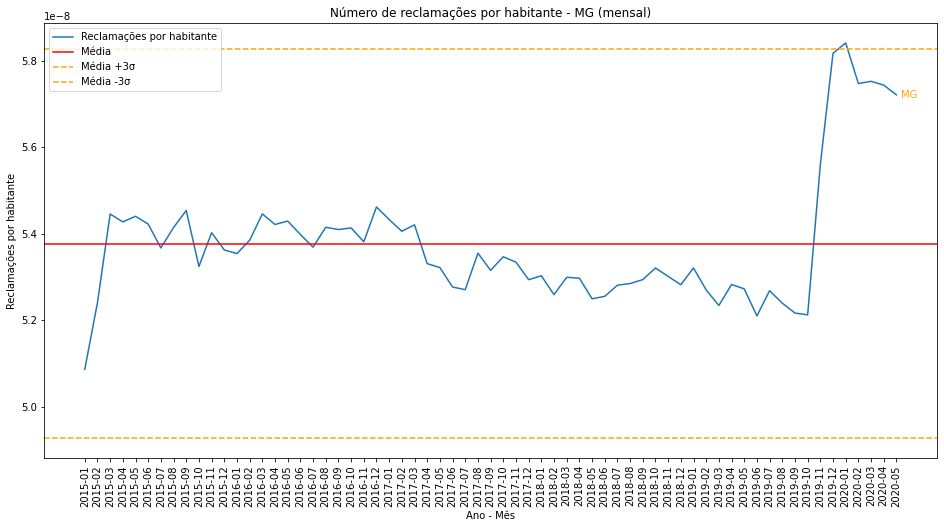

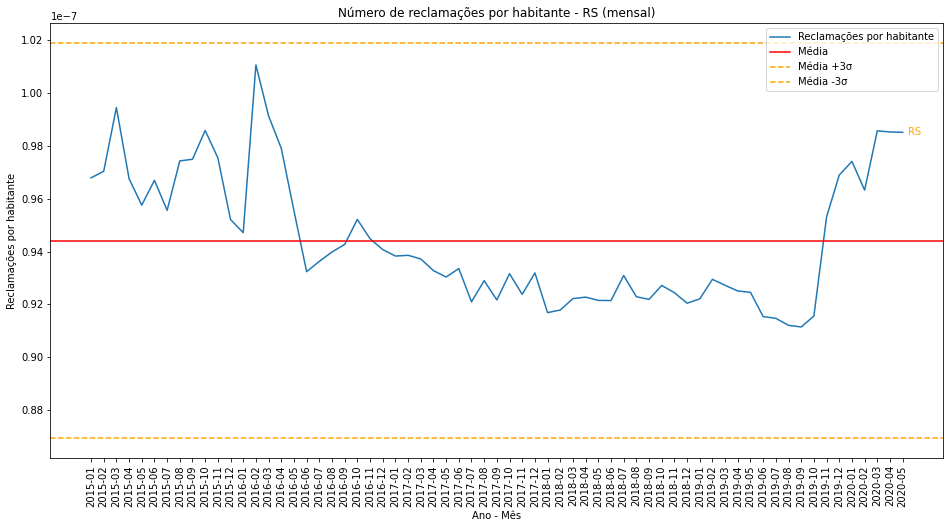

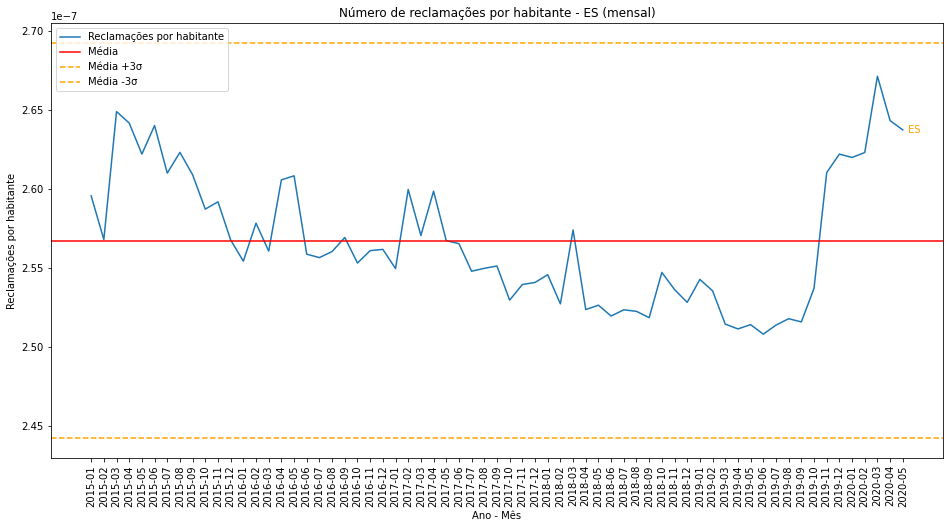

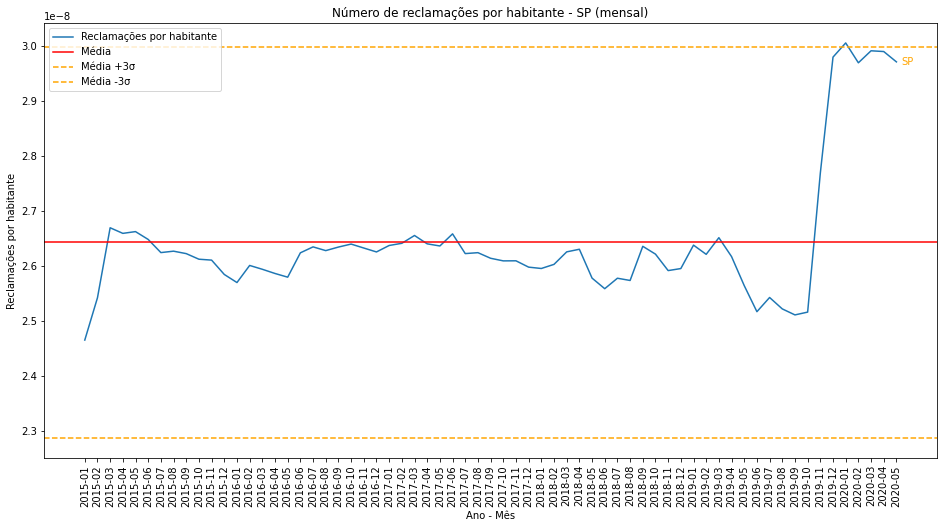

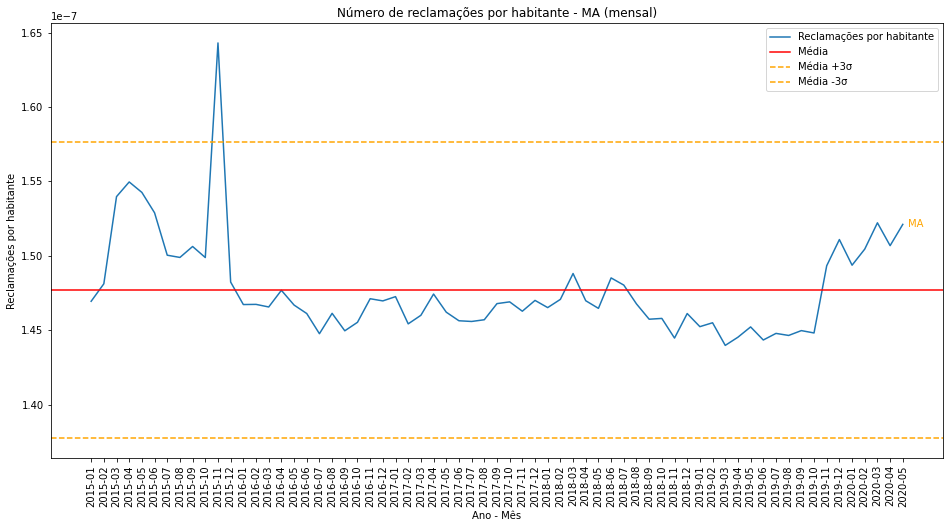

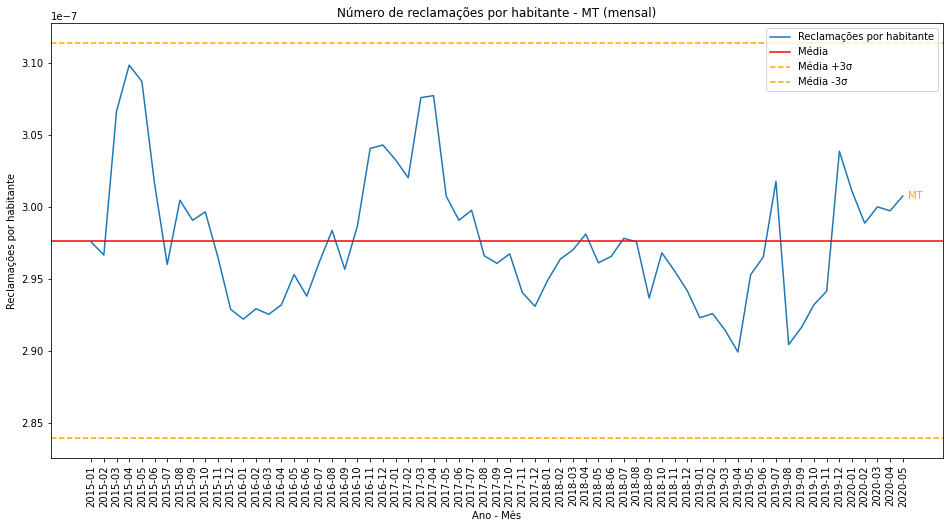

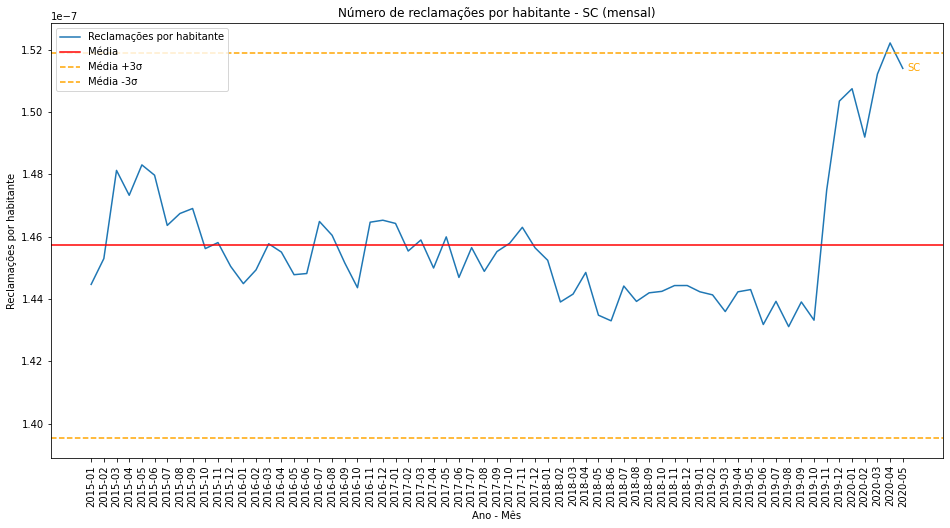

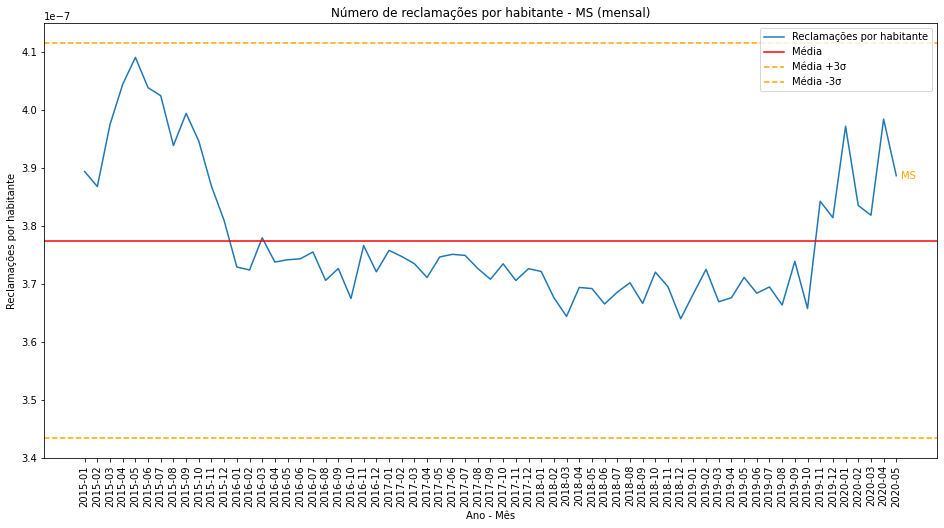

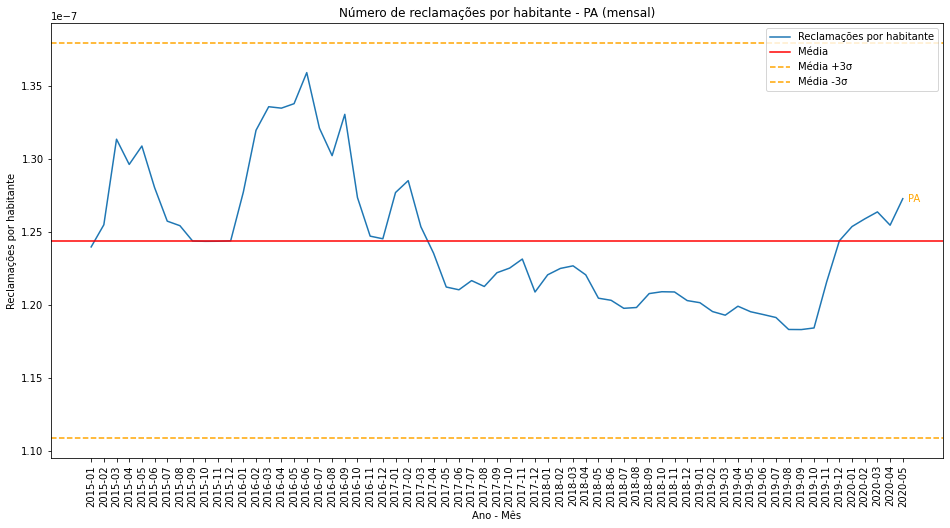

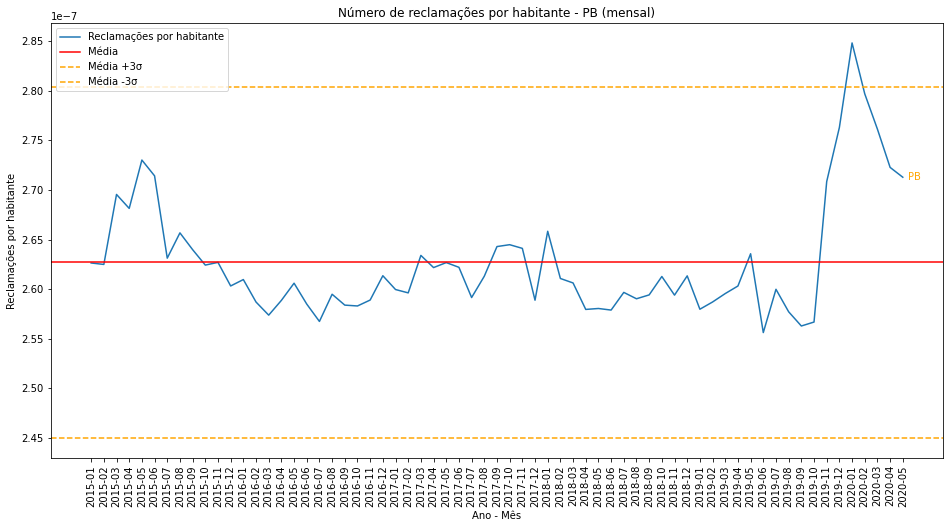

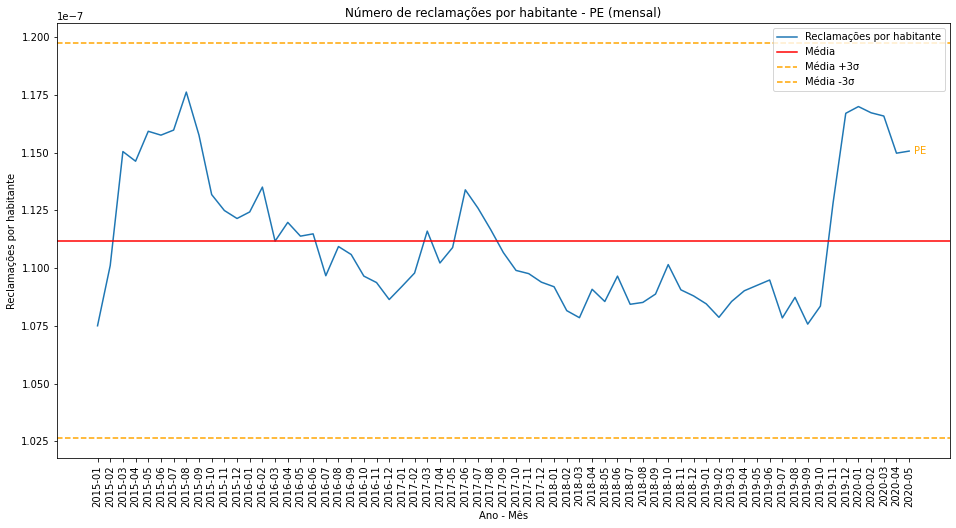

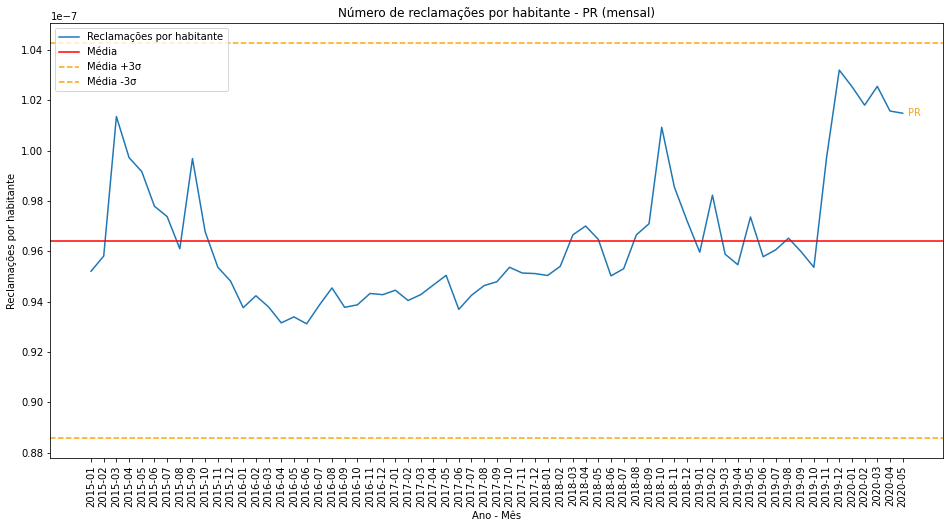

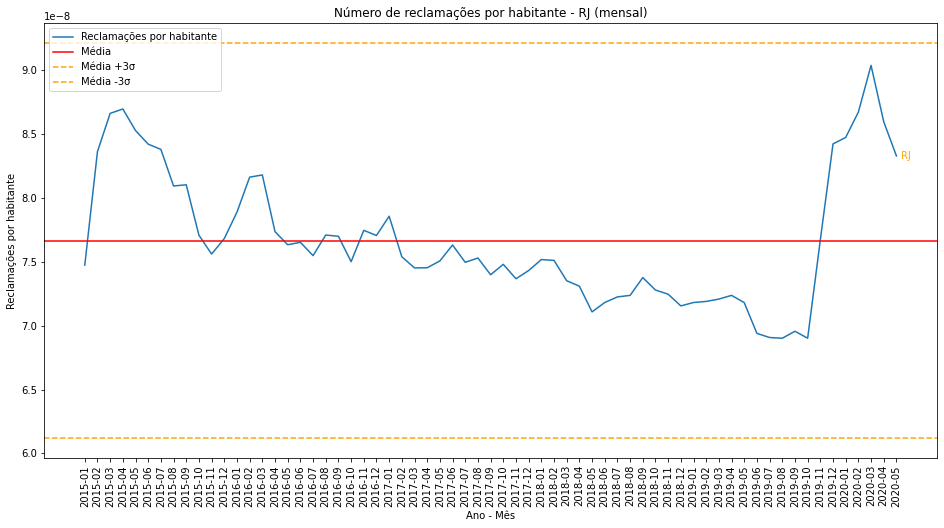

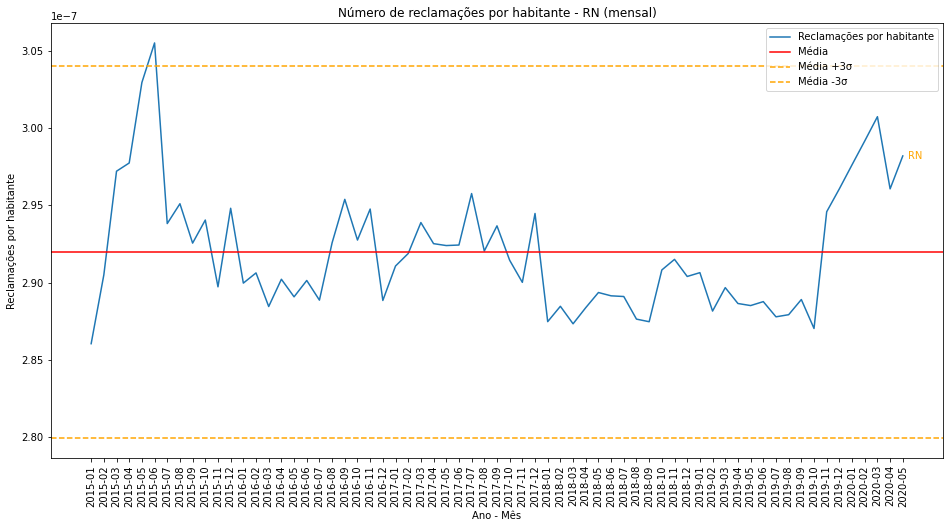

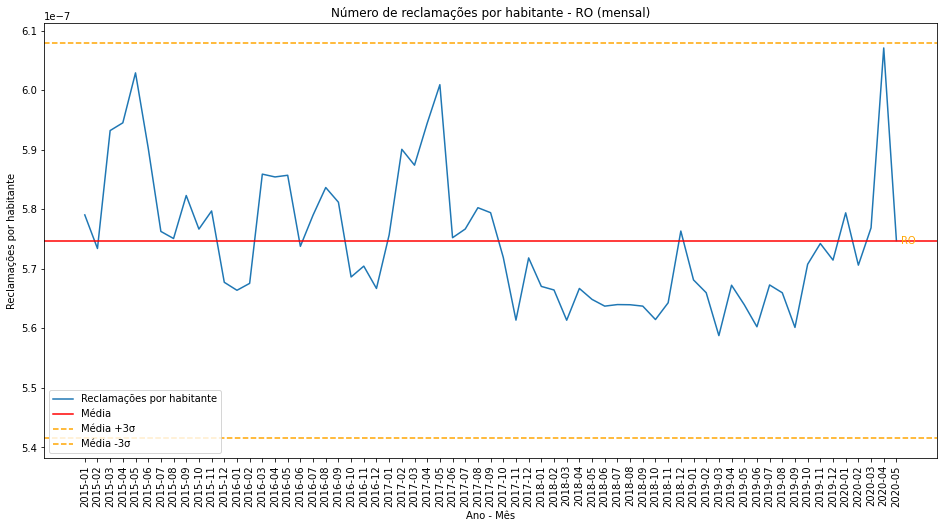

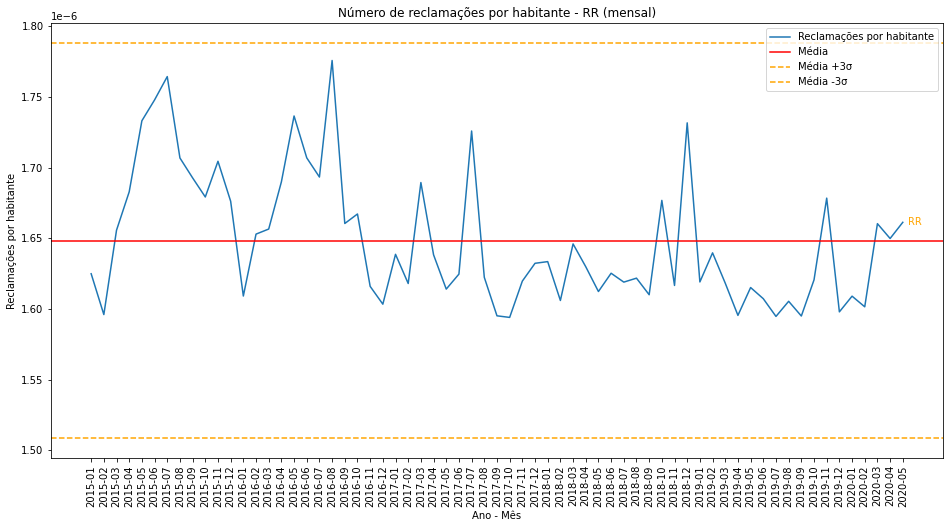

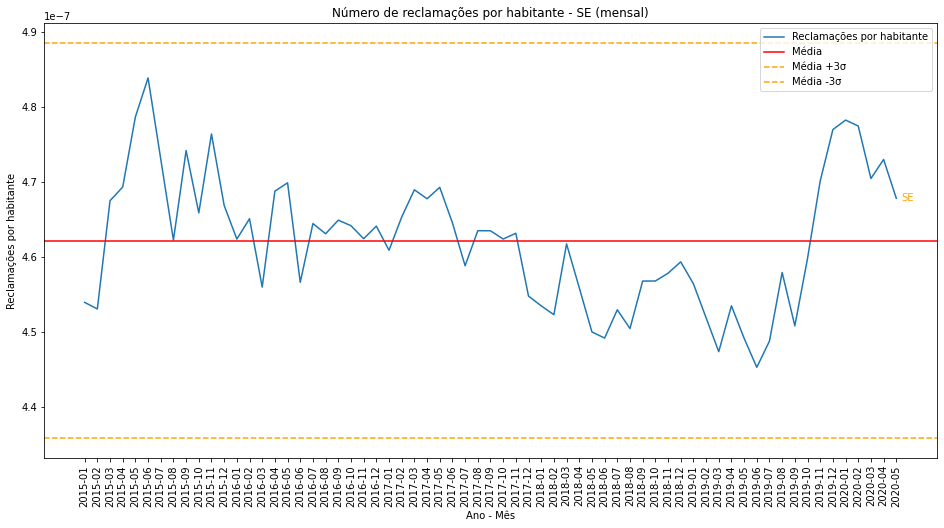

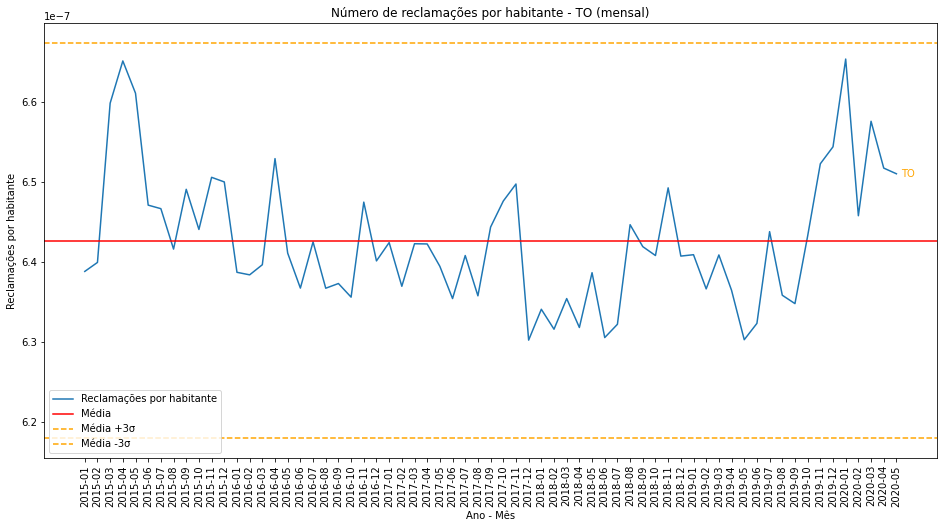

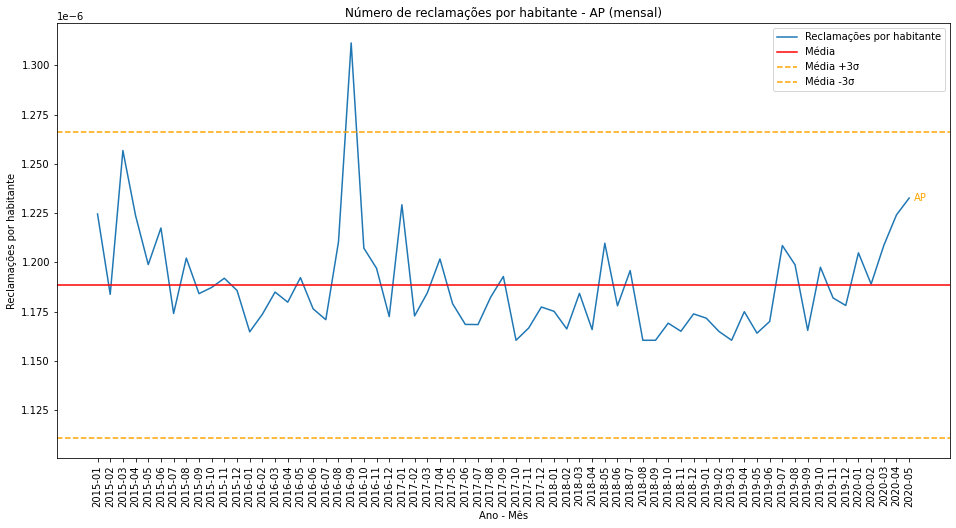

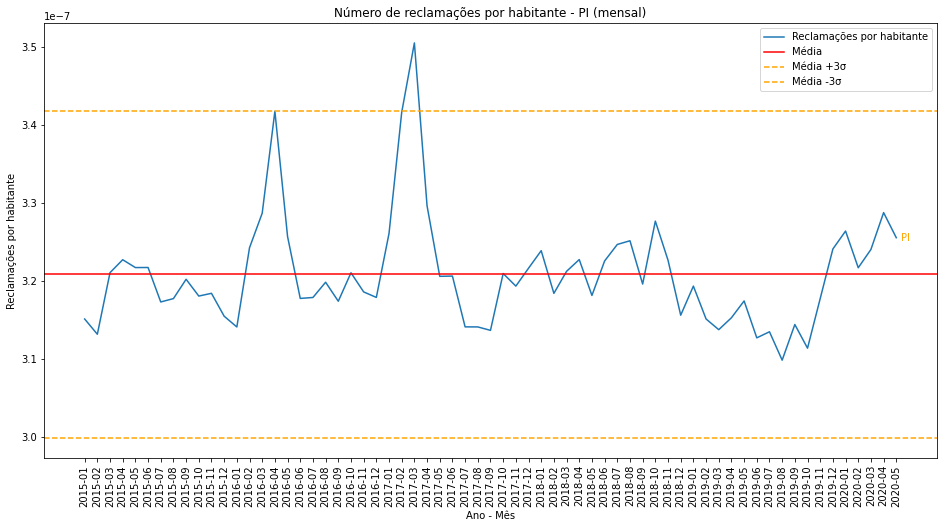

IndexError: index 0 is out of bounds for axis 0 with size 0

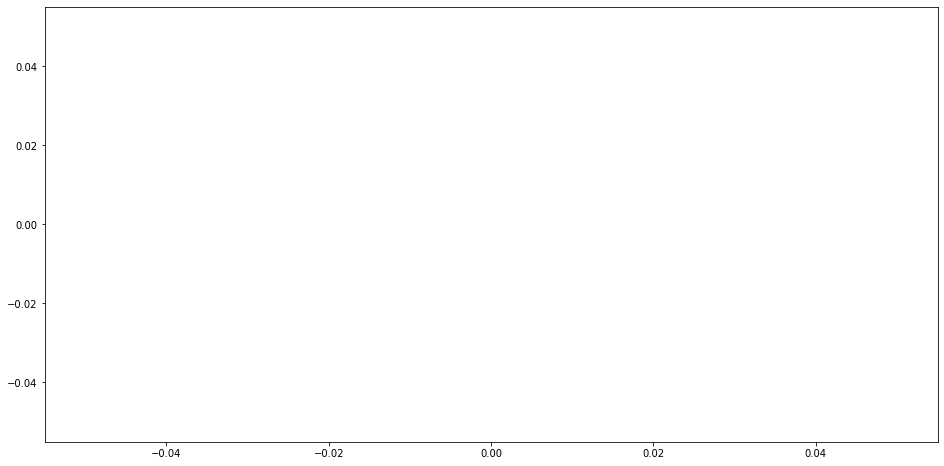

In [ ]:
# Loop pelos estados
for uf in df['UF'].unique():
    # Filtrar os dados para o estado atual
    df_uf = df[df['UF'] == uf]

    # Agrupar os dados por mês e calcular a média de reclamações por habitante
    df_uf = df_uf.groupby('AnoMês').mean()['reclamacoes_por_habitante']

    # Calcular a média e desvio padrão
    media = df_uf.mean()
    desvio_padrao = df_uf.std()

    # Calcular os limites superior e inferior do CEP
    cep_sup = media + 3*desvio_padrao
    cep_inf = media - 3*desvio_padrao

    # Criar o gráfico de linha
    fig, ax = plt.subplots(figsize=(16,8))
    ax.plot(df_uf.index, df_uf.values, label='Reclamações por habitante')
    ax.axhline(media, color='red', label='Média')
    ax.axhline(cep_sup, color='orange', linestyle='--', label='Média +3σ')
    ax.axhline(cep_inf, color='orange', linestyle='--', label='Média -3σ')

    # Adicionar a legenda ao lado da linha
    last_data = df_uf.tail(1)
    ax.annotate(uf, xy=(last_data.index.values[0], last_data.values[0]), xytext=(5, 0), 
                textcoords="offset points", va="center", ha='left', color=ax.get_lines()[-1].get_color())

    # Definir os títulos e rótulos dos eixos
    ax.set_title(f'Número de reclamações por habitante - {uf} (mensal)')
    ax.set_xlabel('Ano - Mês')
    ax.set_ylabel('Reclamações por habitante')
    ax.xaxis.set_tick_params(rotation=90)
    ax.legend()

    # Exibir o gráfico
    plt.show()
